Reference: https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/reecewu/Desktop/DAproject/Restaurant revenue_240503/rawdata.csv')

df.head()

,Business_Section,Number_of_Customers,Staff_Costs,Marketing_Spend,Set_Meal,Dining_Time,Promotions,Reviews,Daily_Revenue
0,1,61,4312,2533,Set1,72,0,45,35090
1,2,24,4002,916,Set2,36,0,36,22130
2,3,81,4198,931,Set1,45,1,91,32650
3,1,70,4301,883,Set2,38,1,59,34820
4,2,30,1746,695,Set2,26,1,30,18500


In [3]:
df.describe()

,Business_Section,Number_of_Customers,Staff_Costs,Marketing_Spend,Dining_Time,Promotions,Reviews,Daily_Revenue
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.000000,53.165650,3027.464431,1987.377033,59.030488,0.501016,50.043699,26853.760163
std,0.816912,26.348243,1130.449915,1172.326272,22.916698,0.500253,29.314535,10436.009734
min,1.000000,10.000000,1001.000000,1.000000,20.000000,0.000000,0.000000,-2900.000000
25%,1.000000,30.000000,2051.500000,935.500000,39.000000,0.000000,24.000000,19677.500000
50%,2.000000,53.500000,3090.000000,1991.500000,59.000000,1.000000,51.000000,26920.000000
75%,3.000000,74.000000,3992.500000,3000.000000,79.000000,1.000000,76.000000,34350.000000
max,3.000000,99.000000,4997.000000,3999.000000,100.000000,1.000000,99.000000,56340.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Business_Section     984 non-null    int64 
 1   Number_of_Customers  984 non-null    int64 
 2   Staff_Costs          984 non-null    int64 
 3   Marketing_Spend      984 non-null    int64 
 4   Set_Meal             984 non-null    object
 5   Dining_Time          984 non-null    int64 
 6   Promotions           984 non-null    int64 
 7   Reviews              984 non-null    int64 
 8   Daily_Revenue        984 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 69.3+ KB


In [5]:
df.isnull().sum()

Business_Section       0
Number_of_Customers    0
Staff_Costs            0
Marketing_Spend        0
Set_Meal               0
Dining_Time            0
Promotions             0
Reviews                0
Daily_Revenue          0
dtype: int64

In [6]:
df['Set_Meal'].unique()

array(['Set1', 'Set2', 'Set3', 'Set4'], dtype=object)

In [7]:
df = pd.get_dummies(df)
df = df.drop(columns = 'Set_Meal_Set1')

df.head()

,Business_Section,Number_of_Customers,Staff_Costs,Marketing_Spend,Dining_Time,Promotions,Reviews,Daily_Revenue,Set_Meal_Set2,Set_Meal_Set3,Set_Meal_Set4
0,1,61,4312,2533,72,0,45,35090,0,0,0
1,2,24,4002,916,36,0,36,22130,1,0,0
2,3,81,4198,931,45,1,91,32650,0,0,0
3,1,70,4301,883,38,1,59,34820,1,0,0
4,2,30,1746,695,26,1,30,18500,1,0,0


In [8]:
X = df.drop(columns = 'Daily_Revenue')
y = df['Daily_Revenue']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler_whole = StandardScaler()

X_train_scaled = scaler_whole.fit_transform(X_train)
X_test_scaled = scaler_whole.transform(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_metrics(name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    results = [name, mse, rmse, mae, r_squared]
    
    return results

Metrics = pd.DataFrame(columns = ['Model', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared'])

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {
        }
    },
    'DecisionTree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__max_depth': [1, 5, 10, None],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [10, 50, 100, 200],
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params':{
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.5],
            'model__max_depth': [3, 5, 7],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'rbf', 'poly'],
            'model__C': [0.1, 1, 10],
            'model__gamma': ['scale', 'auto']
        }
    }
}

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}

for model_name, model_param in models.items():
    
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model_param['model'])
    ])
    
    clf = GridSearchCV(pipe, model_param['params'], cv = 5)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model_name] = clf.best_estimator_

In [13]:
pd.set_option('display.max_colwidth', None)

df = pd.DataFrame(scores)

df

,model,best_score,best_params
0,LinearRegression,0.670081,{}
1,DecisionTree,0.569534,"{'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2}"
2,RandomForest,0.657741,"{'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 50}"
3,GradientBoosting,0.662604,"{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 50}"
4,SVR,0.432901,"{'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'linear'}"


In [14]:
best_estimators

{'LinearRegression': Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())]),
 'DecisionTree': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model',
                  DecisionTreeRegressor(max_depth=5, min_samples_leaf=4))]),
 'RandomForest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model',
                  RandomForestRegressor(max_depth=5, min_samples_leaf=4,
                                        n_estimators=50))]),
 'GradientBoosting': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model',
                  GradientBoostingRegressor(min_samples_split=10,
                                            n_estimators=50))]),
 'SVR': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', SVR(C=10, kernel='linear'))])}

In [15]:
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10),
    'RandomForest': RandomForestRegressor(max_depth=5, n_estimators=50),
    'GradientBoosting': GradientBoostingRegressor(min_samples_split=10, n_estimators=50),
    'SVR': SVR(C=10, kernel='linear')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results = get_metrics(name, y_test, y_pred)
    Metrics.loc[len(Metrics)] = results

In [16]:
Metrics

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R-squared
0,LinearRegression,3.476440e+07,5896.134547,4649.130012,0.675732
1,DecisionTree,4.470757e+07,6686.371600,5490.725105,0.582986
2,RandomForest,3.977303e+07,6306.585881,5101.176209,0.629014
3,GradientBoosting,4.017957e+07,6338.735396,5153.373700,0.625222
4,SVR,5.547960e+07,7448.463108,5996.155275,0.482509


In [17]:
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

In [18]:
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients_df = coefficients_df.sort_values(by = 'Coefficient', ascending = False)

coefficients_df

,Feature,Coefficient
1,Number_of_Customers,3556.681122
3,Marketing_Spend,1296.659234
2,Staff_Costs,1264.605337
9,Set_Meal_Set4,74.612378
5,Promotions,31.711973
8,Set_Meal_Set3,-15.463579
6,Reviews,-41.282047
4,Dining_Time,-167.276688
0,Business_Section,-219.142566
7,Set_Meal_Set2,-242.432407


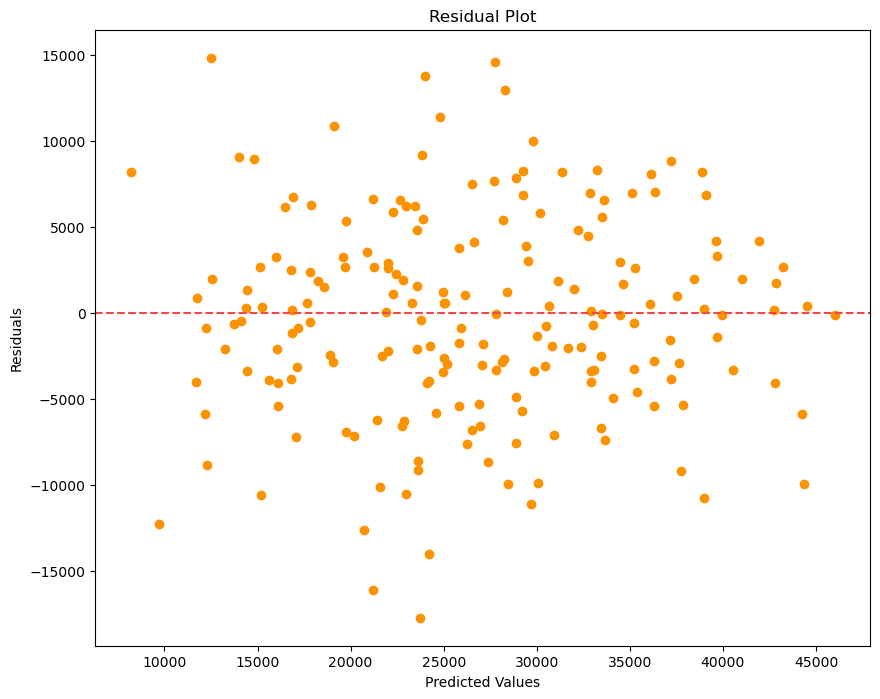

In [24]:
residuals = y_test - y_pred

plt.figure(figsize = (10, 8), dpi = 100)
plt.scatter(y_pred, residuals, color = '#fb9300')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y = 0, color = '#f54748', linestyle = '--')
plt.show()

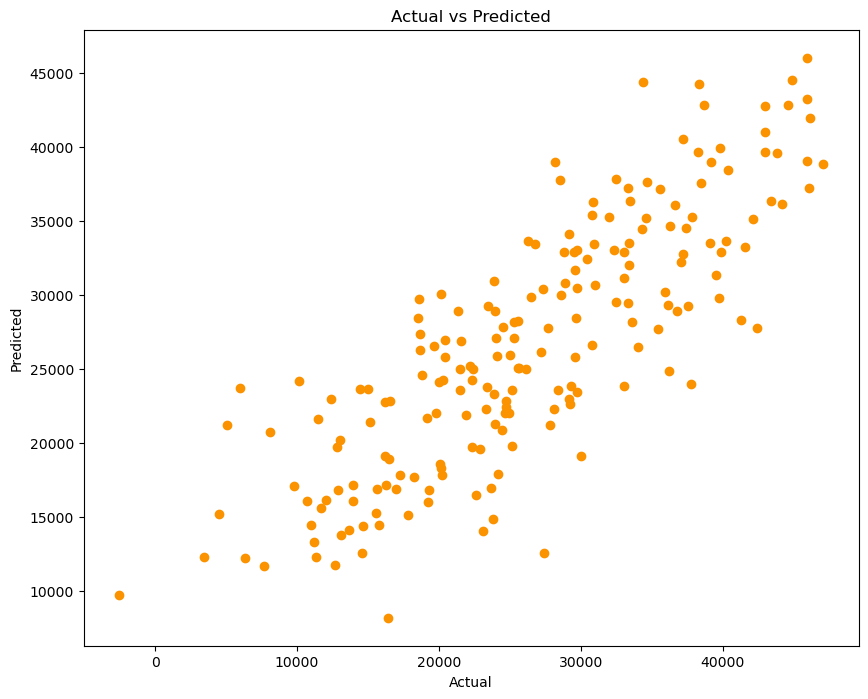

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize = (10, 8), dpi = 100)
plt.scatter(results['Actual'], results['Predicted'], color = '#fb9300')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [21]:
X

,Business_Section,Number_of_Customers,Staff_Costs,Marketing_Spend,Dining_Time,Promotions,Reviews,Set_Meal_Set2,Set_Meal_Set3,Set_Meal_Set4
0,1,61,4312,2533,72,0,45,0,0,0
1,2,24,4002,916,36,0,36,1,0,0
2,3,81,4198,931,45,1,91,0,0,0
3,1,70,4301,883,38,1,59,1,0,0
4,2,30,1746,695,26,1,30,1,0,0
...,...,...,...,...,...,...,...,...,...,...
979,2,33,4406,1471,53,1,35,0,1,0
980,3,47,1001,727,56,1,57,1,0,0
981,1,44,1071,1742,44,1,75,1,0,0
982,2,58,3410,1328,77,1,37,1,0,0


In [22]:
X_new = np.array([[3,40,2000,1000,30,0,90,1,0,0],
                  [3,40,2000,1000,60,0,90,0,0,1],
                  [1,40,2000,1000,90,0,30,0,0,1]])
X_new_scaled = scaler_whole.transform(X_new)
predicted_y = best_model.predict(X_new_scaled)

predicted_y

/Users/reecewu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([18007.76963355, 18338.36036721, 18990.71038352])